## Bounding box area versus corners
Using OpenCV to do image processing and get the area of the bounding box. 

**corners, bounding box, ratio box to area**

In [29]:
%matplotlib inline
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import math
from __future__ import division

from scipy import stats

In [30]:
import pandas

In [31]:
def get_boundingBox(image_path, area=False, rotate=True):
    # get the image
    im_in = cv2.imread(image_path,0)

    # Threshold.
    # Set values equal to or above 220 to 0.
    # Set values below 220 to 255.

    th, im_th = cv2.threshold(im_in, 225, 255, cv2.THRESH_BINARY_INV);

    # Copy the thresholded image.
    im_floodfill = im_th.copy()

    # Mask used to flood filling.
    # Notice the size needs to be 2 pixels than the image.
    h, w = im_th.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, (0,0), 255);

    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.
    im_out = im_th | im_floodfill_inv

    im_out, contours,hierarchy = cv2.findContours(im_out, 1, 2)
    cnt = contours[0]
    cntArea = cv2.contourArea(cnt)
    
    if rotate:
        # Now get the bounding box
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        if area:
            return rect[1][0] * rect[1][1], int(cntArea)

        return im_out, box
   
    else:
        x,y,w,h = cv2.boundingRect(cnt)
        box = np.array([[x,y],[x,y+h],[x+w, y+h],[x+w,y]])
        
        if area: 
            return w*h, int(cntArea)
        
        return im_out, box
    

### Testing
Testing the bounding box function and printing it out, making sure that the box is correct

0.353531746032


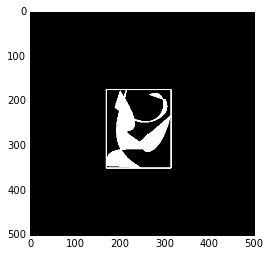

In [34]:
test_image = os.path.join(cwd, "images", str(10), "LC", "LC4")

# running function
test_box = get_boundingBox(test_image, area=False, rotate=False)

# Show the output
output = cv2.drawContours(test_box[0],[test_box[1]],0,(255,255,255),2)
plt.imshow(output, cmap = 'gray')

# Get the area
test_box = get_boundingBox(test_image, area=True, rotate=False)
print test_box[1]/test_box[0]

## Comparing with a straight bounding rectangle
Area of bounding box 

In [35]:
cwd = os.getcwd()

In [36]:
corners = []
boxArea = []
areaRatio = []

In [38]:
for i in range(13):
    sc_dir = os.path.join(cwd, "images", str(i))

    for method in os.listdir(sc_dir):
        image_method = os.path.join(sc_dir, method)
        
        if method == ".DS_Store":
            os.remove(image_method)
            continue
            
        for num in range(15):
            imageFile = os.path.join(image_method, method + str(num))
            
            if imageFile == ".DS_Store" + str(num):
                os.remove(os.path.join(image_method, ".DS_Store"))
                continue
                
            area = get_boundingBox(imageFile, area=True, rotate=False)
            if area[0] <= 0:
                print "Bad: " + imageFile 
            
            corners.append(i+1)
            boxArea.append(area[0])    
            areaRatio.append(area[1]/area[0])

### Plotting 
Plotting corners versus bounding box area


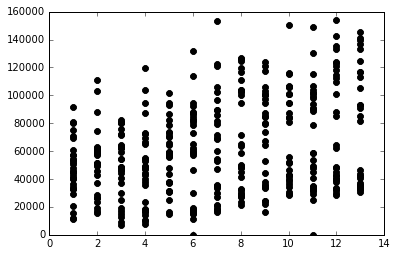

In [39]:
plt.plot(corners, boxArea, 'ko')

## Bounding box:Area of shape versus corners

### Plotting 
Plotting corners versus bounding box area


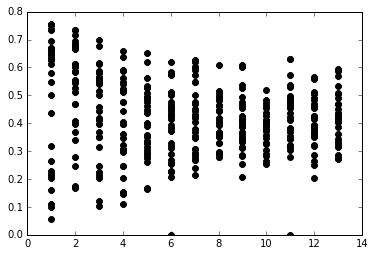

In [40]:
plt.plot(corners, areaRatio, 'ko')

# Correlations

In [41]:
allData = np.array([corners, boxArea, areaRatio])

In [42]:
corr = np.corrcoef(allData)

In [43]:
corr

array([[ 1.        ,  0.29263958, -0.1768541 ],
       [ 0.29263958,  1.        , -0.04007765],
       [-0.1768541 , -0.04007765,  1.        ]])

**Saving correlation matrix as csv**

In [20]:
corrdf = pandas.DataFrame(data=corr, index=["corners","boxArea","areaRatio"], 
                columns=["corners","boxArea","areaRatio"])

In [22]:
pandas.DataFrame.to_csv(corrdf, "shapeCorr.csv")